In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/macrodrigues/code/macrodrigues/skills_matcher/data/dictionaries/all_skills.csv')
df = df.drop_duplicates()

In [2]:
df = df.reset_index().drop(['index'], axis = 1)

In [3]:
l1 = []
l2 = []
for i in range(0, len(df['Skill'])):
    l1.append(df['Skill'][i])
    l2.append({'entities': [(0, len(df['Skill'][i]), df['Label'][i])]})
    
train_data = list(zip(l1, l2))

In [4]:
train_data[0:3]

[('Access software', {'entities': [(0, 15, 'SKILL')]}),
 ('Cisco AnyConnect', {'entities': [(0, 16, 'SKILL')]}),
 ('Calendar and scheduling software', {'entities': [(0, 32, 'SKILL')]})]

In [5]:
%%time
import spacy
from spacy import displacy
from spacy.tokens import DocBin
from spacy.training.example import Example
from tqdm import tqdm

np.random.seed(42)

# set blank 'en' model 
nlp = spacy.blank('en')

# set pipeline
# ner = nlp.create_pipe("ner")
nlp.add_pipe('ner')

# for _, annotations in train_data:
#     for ent in annotations.get('entities'):
#         ner.add_label(ent[2])
        
# other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
# with nlp.disable_pipes(*other_pipes):  # only train NER
optimizer = nlp.begin_training()
epoch = 0
all_losses = []
for batch in spacy.util.minibatch(train_data, size=1):
    np.random.shuffle(train_data)
    losses = {}
    for text, annotations in batch:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            # Update the model
            nlp.update([example], sgd = optimizer, losses=losses, drop=0.81)
            epoch += 1
            all_losses.append(losses)

2021-12-01 16:36:25.682142: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-01 16:36:25.682221: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


CPU times: user 2min 2s, sys: 682 ms, total: 2min 3s
Wall time: 2min 3s


In [6]:
all_losses = [all_losses[i]['ner'] for i in range(len(all_losses))]

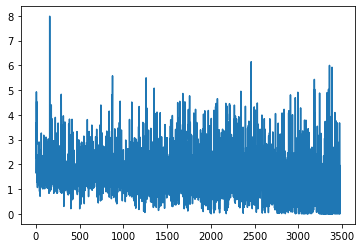

In [7]:
import matplotlib.pyplot as plt

x = list(range(len(all_losses)))
y = all_losses

plt.plot(x, y)

In [8]:
from pathlib import Path

output_dir = Path('/home/macrodrigues/code/macrodrigues/skills_matcher/data/model_1')
output_dir.mkdir()
nlp.to_disk(output_dir)

FileExistsError: [Errno 17] File exists: '/home/macrodrigues/code/macrodrigues/skills_matcher/data/model_1'

In [ ]:
df = pd.read_csv('/home/macrodrigues/code/macrodrigues/skills_matcher/data/cleaned_data.csv')
df = df.dropna()

In [ ]:
raw_text= df.description[460]

nlp2 = spacy.load('/home/macrodrigues/code/macrodrigues/skills_matcher/data/model_1')
doc = nlp(raw_text)
doc2 = nlp2(raw_text)

ents = [(e.text, e.start, e.end, e.label_) for e in doc.ents]
ents2 = [(e.text, e.start, e.end, e.label_) for e in doc2.ents]
#print(ents)
displacy.render(doc, style="ent")
#displacy.render(doc2, style="ent")

ents

In [ ]:
#nlp_skills = spacy.load('/home/macrodrigues/code/macrodrigues/skills_matcher/data/model')
nlp_en = spacy.load("en_core_web_sm")
doc3 = nlp_en(raw_text)
ents3 = [(e.text, e.start, e.end, e.label_) for e in doc3.ents]
displacy.render(doc3, style="ent")

## Try model 

In [41]:
#DATA FOR MODEL

data = pd.read_csv('/home/macrodrigues/code/macrodrigues/skills_matcher/data/dictionaries/all_skills.csv')
data = data.drop_duplicates()
data = data.reset_index().drop(['index'], axis = 1)

df = pd.read_csv('/home/macrodrigues/code/macrodrigues/skills_matcher/data/cleaned_data.csv')
df = df.dropna()

In [44]:
from model_script import get_train_data, generate_n_save_model, get_skills 

train_data = get_train_data(data[:100])

generate_n_save_model(train_data, 'new_model', lang='en', pipe='ner', batch_size=1, drop=0.83)

FileExistsError: [Errno 17] File exists: '/home/macrodrigues/code/macrodrigues/skills_matcher/data/new_model'

In [ ]:
res = get_skills('new_model', df.description[150])

In [47]:
PATH = os.path.dirname(os.getcwd())

PATH

'/home/macrodrigues/code/macrodrigues/skills_matcher'